# Cifar-10 이미지 분류

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

## 1. 데이터 전처리

In [2]:
# 상수 설정
BATCH_SIZE = 32
NUM_CLASSES =10
EPOCHS = 100
DATA_AUGMENTATION = True
NUM_PREDICTIONS =20
modelpath = 'best_cifar-10.h5'

In [3]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 243s 1us/step


In [4]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

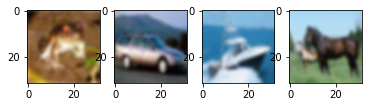

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(141)
plt.imshow(X_train[0], interpolation = 'bicubic')

plt.subplot(142)
plt.imshow(X_train[4], interpolation = 'bicubic')

plt.subplot(143)
plt.imshow(X_train[8], interpolation = 'bicubic')

plt.subplot(144)
plt.imshow(X_train[12], interpolation = 'bicubic')

In [8]:
class_name = ['airplane','automobile','bird','cat','deer',
                'dog','frog','horse','ship','truck']
                
class_name[y_train[0][0]],class_name[y_train[4][0]], \
class_name[y_train[8][0]],class_name[y_train[12][0]]

('frog', 'automobile', 'ship', 'horse')

In [9]:
# 0과 1 사이 값으로 정규화
X_train = X_train / 255.0
X_test = X_test /255.0

In [11]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((50000, 10), (10000, 10))

## 2. 모델 정의, 설정, 실행, 평가

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.layers import MaxPooling2D , Dropout  # 모델 정의시
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping  # 모델 학습시, collback

In [15]:
model = Sequential([
    Conv2D(32,(3,3), padding = 'same', input_shape = (32,32,3), activation='relu'), # input_shape: Xsize때문 (32*32), color라서 3
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(32,(3,3), padding = 'same', activation='relu'), # input_shape: Xsize때문 (32*32), color라서 3
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0

In [16]:
from tensorflow.keras.optimizers import RMSprop
opt = RMSprop(learning_rate=0.0001, decay = 1e-6)


model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

In [17]:
checkpoint = ModelCheckpoint(modelpath, verbose=1, save_best_only=True)  #callbacks 설정
early_stopping = EarlyStopping(patience=10) #callbacks 설정

In [18]:
# 모델 학습
history = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/100
1249/1250 [============================>.] - ETA: 0s - loss: 1.6367 - accuracy: 0.3984
Epoch 00001: val_loss improved from inf to 1.30729, saving model to best_cifar-10.h5
1250/1250 [==============================] - 62s 49ms/step - loss: 1.6366 - accuracy: 0.3985 - val_loss: 1.3073 - val_accuracy: 0.5399
Epoch 2/100
1250/1250 [==============================] - ETA: 0s - loss: 1.2619 - accuracy: 0.5457
Epoch 00002: val_loss improved from 1.30729 to 1.08672, saving model to best_cifar-10.h5
1250/1250 [==============================] - 68s 54ms/step - loss: 1.2619 - accuracy: 0.5457 - val_loss: 1.0867 - val_accuracy: 0.6074
Epoch 3/100
1250/1250 [==============================] - ETA: 0s - loss: 1.1069 - accuracy: 0.6073
Epoch 00003: val_loss improved from 1.08672 to 1.00777, saving model to best_cifar-10.h5
1250/1250 [==============================] - 65s 52ms/step - loss: 1.1069 - accuracy: 0.6073 - val_loss: 1.0078 - val_accuracy: 0.6387
Epoch 4/100
1250/1250 [============

In [21]:
from tensorflow.keras.models import load_model
best_model = load_model(modelpath )
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.6870 - accuracy: 0.7762


[0.6869523525238037, 0.776199996471405]